<div style="text-align: center;">
    <h1><u>IRIS FLOWER CLASSIFICATION</u></h1>
</div>

1. [Importing Libraries](#import)
2. [Importing Dataset through CSV file](#csv)
3. [Exploratory Data Analysis (EDA)](#eda)
4. [Data Visualization](#dv)
5. [Model Building And Testing](#model)
    - [Using Raw Dataset](#raw)
    - [After Standarization of Dataset](#std)
6. [Observation](#Observation)

<h1><u>Importing Libraries</u></h1>
<a id="import"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

** **

<h1><u>Importing Dataset through CSV file</u></h1>
<a id="csv"></a>

In [3]:
iris = pd.read_csv(r"C:\Users\Admin\Desktop\AFAME INTERNSHIP\IRIS Flower.csv")

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


** **

<h1><u>Exploratory Data Analysis (EDA)</u></h1>
<a id="eda"></a>

In [5]:
iris.shape

(150, 5)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [8]:
# From below it's confirmed that there is no null/nan data in the iris dataset.
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
# Removing duplicates from dataset.
print(iris.duplicated().sum())
iris.drop_duplicates(inplace = True)
print(iris.duplicated().sum())

3
0


** **

<h1><u>Data Visualization</u></h1>
<a id="dv"></a>

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64


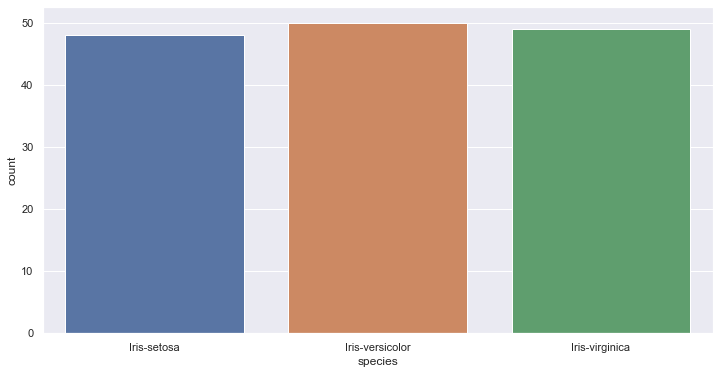

In [11]:
print(iris["species"].value_counts())
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x = iris["species"], data=iris)

### Scatterplot

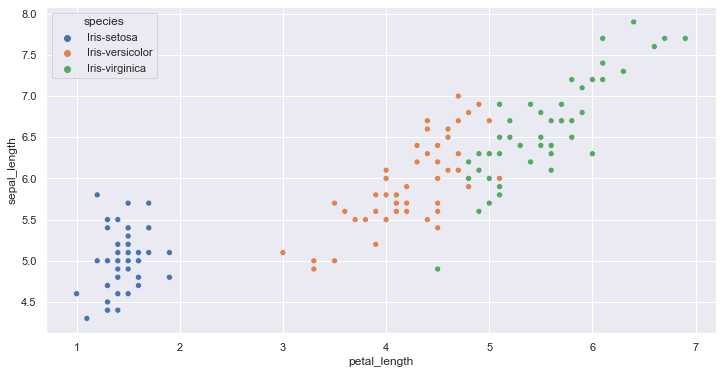

In [12]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
ax = sns.scatterplot( x = iris["petal_length"], y = iris["sepal_length"], hue = iris["species"])

### Pairplot

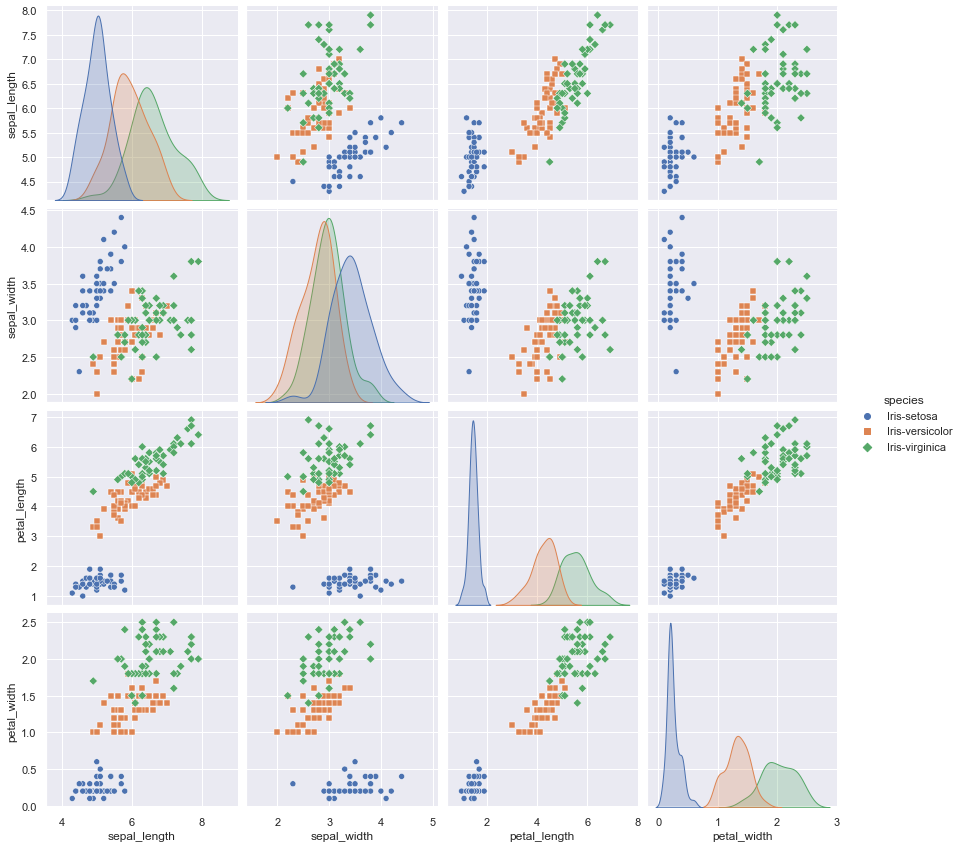

In [13]:
sns.pairplot(iris,hue="species",size=3, markers=["o", "s", "D"])

Careful observation of above pairplot

### General Observations:
1. **Distribution Plots (Diagonals):**

   - **Petal Length and Petal Width:** The distributions show clear separation between the species. Iris-setosa forms a distinct group with lower values, while Iris-versicolor and Iris-virginica have overlapping but distinguishable distributions.
   - **Sepal Length and Sepal Width:** There is some overlap between the species, but Iris-setosa can be somewhat separated from Iris-versicolor and Iris-virginica.
   

### Pairwise Relationships:
1. **Sepal Length vs. Sepal Width:**
    - There is a weak negative correlation between sepal length and sepal width, particularly for Iris-setosa.
    - Iris-setosa (blue) forms a distinct cluster with lower sepal lengths and higher sepal widths.
    - Iris-versicolor and Iris-virginica do not show a strong correlation between these two features, and there is more spread in the data points.
    - Iris-versicolor (orange) and Iris-virginica (green) show some overlap but can be separated by looking at a combination of sepal length and width.
   

2. **Petal Length vs. Petal Width:**
   - There is a strong positive correlation between petal length and petal width for all species.
   - There is a linear relationship and clear separation between the species. Iris-setosa forms a distinct cluster with lower petal lengths and widths.
   - Iris-versicolor and Iris-virginica are linearly separable in this space, with Iris-virginica having higher petal lengths and widths.
   

3. **Sepal Length vs. Petal Length:**
   - There is a moderate to strong positive correlation between sepal length and petal length.
   - Iris-setosa forms a distinct cluster with lower sepal and petal lengths.
   - The correlation is more pronounced for Iris-virginica and Iris-versicolor than for Iris-setosa.
   - Iris-versicolor and Iris-virginica show a linear relationship, but there is some overlap. Iris-virginica generally has higher values for both features.
   

4. **Sepal Length vs. Petal Width:**
   - The correlation is stronger for Iris-virginica and Iris-versicolor, while Iris-setosa shows less variation and a weaker correlation.
   - Iris-setosa forms a distinct cluster, while Iris-versicolor and Iris-virginica show some overlap but are generally distinguishable.
   

5. **Sepal Width vs. Petal Length:**
   - There is a weak to moderate positive correlation between sepal width and petal length.
   - The correlation is more noticeable in Iris-virginica and Iris-versicolor.
   - Iris-setosa forms a distinct cluster, while Iris-versicolor and Iris-virginica show a linear relationship and some overlap.
   

6. **Sepal Width vs. Petal Width:**
   - There is a weak to moderate positive correlation between sepal width and petal width.
   - The correlation is more evident in Iris-virginica and Iris-versicolor.
   - Iris-setosa forms a distinct cluster, while Iris-versicolor and Iris-virginica show some overlap but are generally distinguishable.
  

### Specific Analogies:
1. **Distinct Separation for Iris-setosa:**
   - Across almost all pairwise plots, Iris-setosa forms a distinct cluster, indicating it is easily separable from the other two species based on any pair of features.
   

2. **Overlap between Iris-versicolor and Iris-virginica:**
   - While these two species show some overlap in several pairwise plots, they can still be separated using combinations of petal length and petal width. This indicates that these two species are more similar to each other than to Iris-setosa.
   

3. **Petal Features as Strong Indicators:**
   - Petal length and petal width are strong indicators for distinguishing between the three species. This is evident from the clear separation seen in the pairwise plots involving these features.
   

4. **Combining Features for Better Separation:**
   - Using a combination of features (e.g., sepal length and petal width) provides better separation between the species than using a single feature alone.
   

In conclusion, the pairplot shows that while Iris-setosa is easily separable from the other two species using any pair of features, Iris-versicolor and Iris-virginica require combinations of features for better separation, with petal features being particularly useful for this purpose.

### How Well the Features Separate the Different Species?
1. **Petal Features:**
    - Petal length and petal width are very effective at separating the species. Iris-setosa is distinctly separate, while Iris-versicolor and Iris-virginica show a clear, albeit overlapping, separation.
    
    
2. **Sepal Features:**

    - Sepal length and sepal width are less effective at separating the species, particularly between Iris-versicolor and Iris-virginica.
    - There is more overlap in sepal features, making them less reliable for distinguishing the species.

### Most Effective Features at Distinguishing between Species

1. **Petal Length and Petal Width:** These are the most effective features for distinguishing between species. They provide clear separation, particularly for Iris-setosa.


2. **Sepal Length:** Moderately effective, especially when combined with petal measurements.


3. **Sepal Width:** Least effective on its own but can still contribute to the overall pattern when combined with other features.

### Histplot

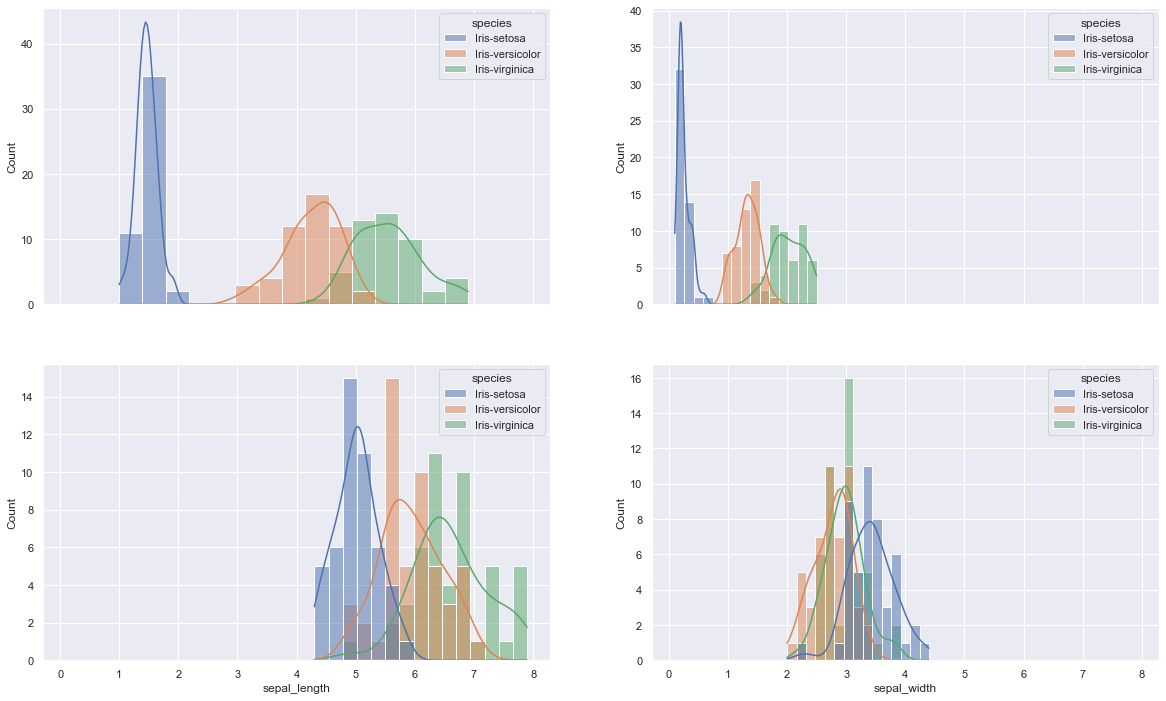

In [21]:
f, axes = plt.subplots(2, 2, figsize=(20, 12), sharex=True)
sns.histplot(data = iris, x = iris["petal_length"], hue = "species", kde=True, bins = 15, ax = axes[0,0], legend=True)
sns.histplot(data = iris, x = iris["petal_width"], hue = "species", kde=True, bins = 15, ax = axes[0,1], legend=True)
sns.histplot(data = iris, x = iris["sepal_length"], hue = "species", kde=True, bins = 15, ax = axes[1,0], legend=True)
sns.histplot(data = iris, x = iris["sepal_width"], hue = "species", kde=True, bins = 15, ax = axes[1,1], legend=True)
plt.show()

Based on the above histograms and kernel density estimates for the Iris dataset's features, grouped by species, here is the analysis:

### 1. Distributions of Each Feature:

- **Petal Length:**
    - **Iris-setosa:** The distribution is tightly clustered with a strong peak around lower values (approximately 1 to 2 cm).
    - **Iris-versicolor:** The distribution is more spread out and peaks around the middle range (approximately 4 to 5 cm).
    - **Iris-virginica:** The distribution is also spread out but peaks at higher values (approximately 5 to 7 cm).
  

- **Petal Width:**
  - **Iris-setosa:** The distribution is tightly clustered with a strong peak around lower values (approximately 0.2 to 0.6 cm).
  - **Iris-versicolor:** The distribution peaks around middle values (approximately 1.2 to 1.8 cm).
  - **Iris-virginica:** The distribution peaks at higher values (approximately 2.0 to 2.5 cm).
  

- **Sepal Length:**
  - **Iris-setosa:** The distribution is tightly clustered with a strong peak around lower values (approximately 4.5 to 5.5 cm).
  - **Iris-versicolor:** The distribution peaks around middle values (approximately 5.5 to 6.3 cm).
  - **Iris-virginica:** The distribution peaks at higher values (approximately 6.3 to 7.5 cm).
  

- **Sepal Width:**
  - **Iris-setosa:** The distribution has a strong peak around middle values (approximately 3.0 to 3.5 cm).
  - **Iris-versicolor:** The distribution is more spread out and peaks around middle values (approximately 2.5 to 3.0 cm).
  - **Iris-virginica:** The distribution peaks at similar middle values (approximately 2.8 to 3.5 cm) but is more spread out.



### 2. Are the Features Normally Distributed or Skewed?

- **Petal Length:**

   - **Iris-setosa:** The distribution is not normal; it is tightly clustered and left-skewed.
   - **Iris-versicolor:** The distribution is approximately normal but slightly skewed.
   - **Iris-virginica:** The distribution is approximately normal but slightly skewed.
  

- **Petal Width:**
  - **Iris-setosa:** The distribution is not normal; it is tightly clustered and left-skewed.
  - **Iris-versicolor:** The distribution is approximately normal but slightly skewed.
  - **Iris-virginica:** The distribution is approximately normal but slightly skewed.
  

- **Sepal Length:**

  - **Iris-setosa:** The distribution is not normal; it is tightly clustered and left-skewed.
  - **Iris-versicolor:** The distribution is approximately normal but slightly skewed.
  - **Iris-virginica:** The distribution is approximately normal but slightly skewed.
  

- **Sepal Width:**

  - **Iris-setosa:** The distribution is not normal; it is tightly clustered and left-skewed.
  - **Iris-versicolor:** The distribution is approximately normal but slightly skewed.
  - **Iris-virginica:** The distribution is approximately normal but slightly skewed.
  
  


- In summary, the features show different patterns of distribution based on the species. The Iris-setosa species tends to have tightly clustered, left-skewed distributions for all features. The Iris-versicolor and Iris-virginica species exhibit more spread-out distributions that are closer to normal, with slight skewness. The separability of the species based on petal length and width is more pronounced, while sepal length and width show more overlap among the species.


- Overall petal length and petal width are bimodal and not normally distributed, suggesting distinct groups within the dataset. Sepal length is closer to a normal distribution with slight skewness, and sepal width shows a sharp peak with slight right skewness.

### Boxplot

<AxesSubplot:>

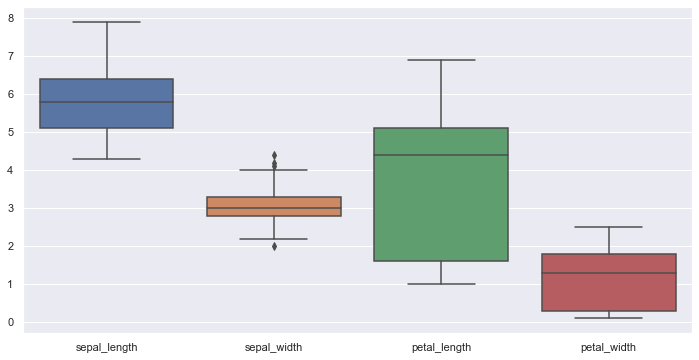

In [53]:
plt.figure(figsize=(12,6))
sns.boxplot(data = iris)

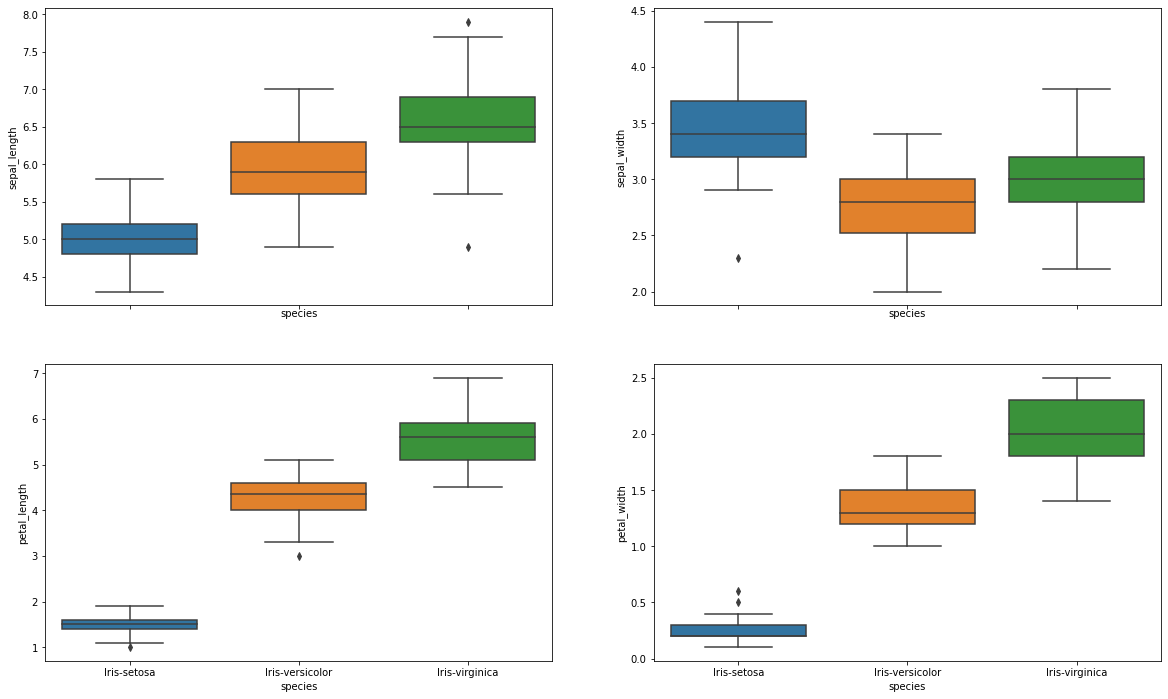

In [18]:
f, axes = plt.subplots(2, 2, figsize=(20, 12), sharex=True)
for ax, feature in zip(axes.flat, iris.columns):
    sns.boxplot(x = iris["species"], y = iris[feature], ax=ax)

### Violinplot

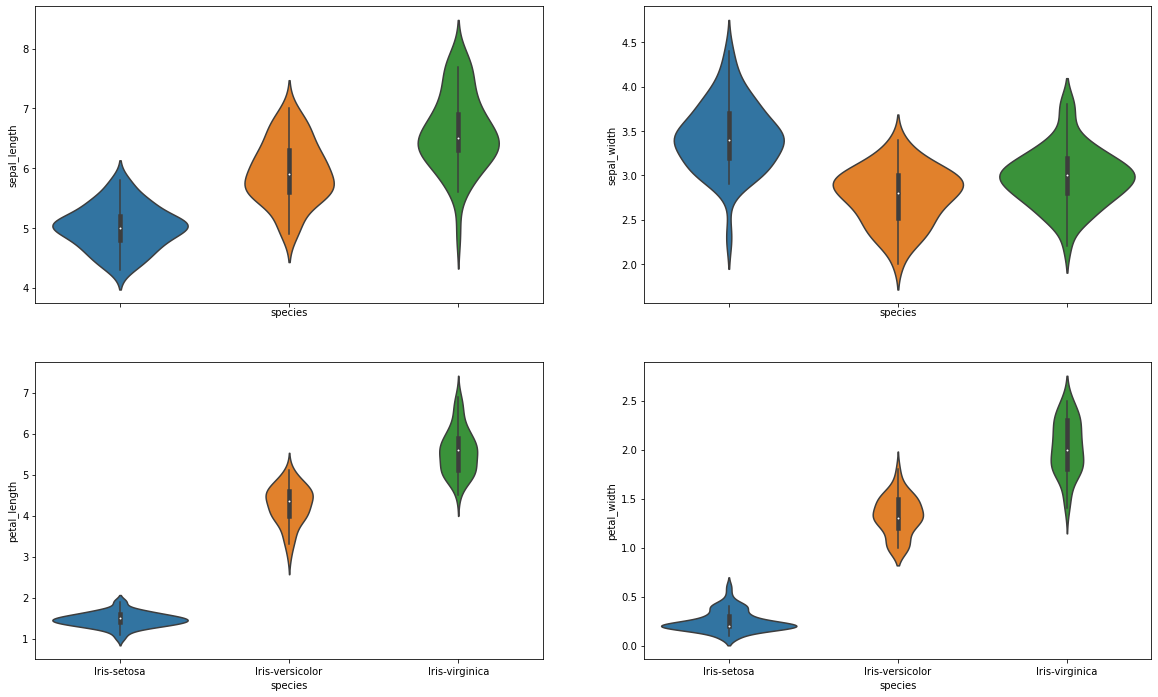

In [19]:
f, axes = plt.subplots(2, 2, figsize=(20, 12), sharex=True)
for ax, feature in zip(axes.flat, iris.columns):
    sns.violinplot(x = iris["species"], y = iris[feature], ax=ax)

### Correlation Heatmap

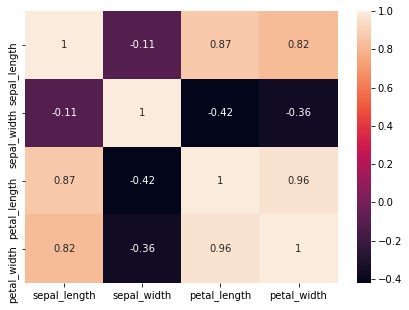

In [16]:
plt.figure(figsize=(7,5))
# Plotting the heatmap
sns.heatmap(iris.corr(), annot=True)
plt.show()

The analysis of the Iris dataset through box plots, violin plots, and a correlation heatmap reveals distinct characteristics among the three species: Iris-setosa, Iris-versicolor, and Iris-virginica.
- Sepal length and petal dimensions (length and width) show strong positive correlations, with petal length and width having the highest correlation (0.96).
- Iris-virginica has the longest sepal and petal lengths, while Iris-setosa has the shortest.
- Sepal width is highest in Iris-setosa but shows weak negative correlations with other features.
- The violin plots illustrate that petal measurements have distinct, non-overlapping distributions among species, aiding in clear differentiation.
- Overall, petal measurements provide better species separation compared to sepal measurements.
- The data visualizations collectively highlight that petal dimensions are key discriminators among the Iris species.

****

In [54]:
# Before removing outlier from the dataset.
skewdata = iris.skew(axis=0,skipna=True)
skewdata.sort_values(axis=0,ascending=True)

petal_length   -0.293763
petal_width    -0.113479
sepal_length    0.292560
sepal_width     0.324351
dtype: float64

** **

In [10]:
iris_data = iris.copy()

In [11]:
iris_data['species'] = iris_data['species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [12]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.9 KB


In [59]:
iris_data.shape

(147, 5)

In [8]:
print(iris_data["species"].value_counts())

1    50
2    49
0    48
Name: species, dtype: int64


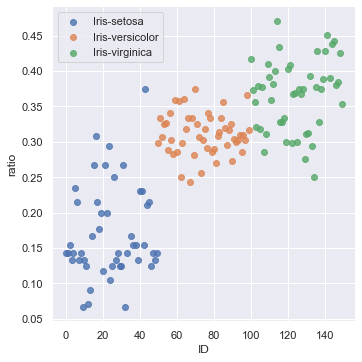

In [61]:
iris["ID"] = iris.index
iris["ratio"] = iris["petal_width"]/iris_data["petal_length"]

sns.lmplot(x="ID", y="ratio", data=iris, hue="species", fit_reg=False, legend=False)

plt.legend()
plt.show()

****

<h1><u>Model Building And Testing</u></h1>
<a id="model"></a>

In [13]:
y = iris_data["species"]
X = iris_data.drop(["species"],axis=1)

In [14]:
# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle = True)

In [15]:
y_test.value_counts()

1    16
0    15
2    14
Name: species, dtype: int64

## Helper Functions

In [16]:
def evaluate(model, y_predict):
    # Model evaluation
    print(classification_report(y_test, y_predict))
    conf_mat = confusion_matrix(y_test, y_predict)
    sns.heatmap(conf_mat, annot=True, fmt='d', 
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [17]:
def learn_curve(model):
    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label='Training score')
    plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
    plt.title('Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc='best')
    plt.show()

<h1><u>Using Raw Dataset</u></h1>
<a id="raw"></a>

### 1. K- Neighbor Classifier

In [18]:
# Hyperparameter tuning

param_grid = {'n_neighbors': [3, 5, 7, 10],
              'weights': ['uniform', 'distance'],
             'p': [1, 2]}

knc = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [19]:
# Fit the model with best parameters
knc = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                           weights=grid_search.best_params_['weights'],
                           p = grid_search.best_params_['p'])
knc.fit(X_train, y_train)

# Make predictions
y_pred = knc.predict(X_test)
print("Train accuracy=",knc.score(X_train, y_train))
print ("Test accuracy=",accuracy_score(y_test, y_pred))

Train accuracy= 0.9607843137254902
Test accuracy= 0.9777777777777777


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



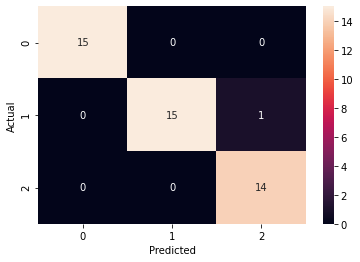

In [20]:
# Model evaluation
evaluate(knc, y_pred)

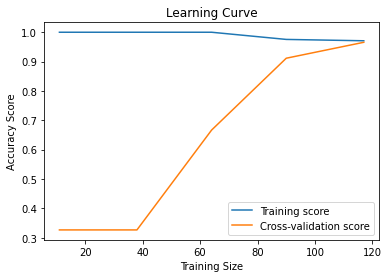

In [21]:
# Learning Curve
learn_curve(knc)

### 2. Linear Support Vector Classification

In [22]:
# Hyperparameter tuning
param_grid = {'penalty': ['l2', 'l1'],
              'loss': ['hinge', 'squared_hinge']}

lsvc = LinearSVC()

grid_search = GridSearchCV(estimator=lsvc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'loss': 'squared_hinge', 'penalty': 'l2'}


In [23]:
# Fit the model with best parameters
lsvc = LinearSVC(penalty=grid_search.best_params_['penalty'], 
                                 loss=grid_search.best_params_['loss'])
lsvc.fit(X_train, y_train)

# Make predictions
y_pred = lsvc.predict(X_test)

print("Train accuracy=",lsvc.score(X_train, y_train))
print ("Test accuracy=",accuracy_score(y_test, y_pred))

Train accuracy= 0.9607843137254902
Test accuracy= 0.9555555555555556


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



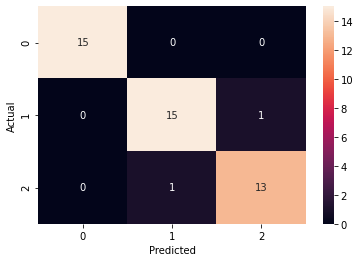

In [24]:
# Model evaluation
evaluate(lsvc, y_pred)

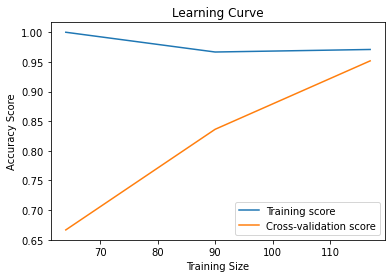

In [25]:
# Learning Curve
learn_curve(lsvc)

### 3. Logistic regression

In [26]:
# Hyperparameter tuning
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
              'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
              'tol': [0.0001, 0.0002, 0.0003],
              'C': [1.0, 0.8, 0.6],
              "random_state":[42, None],
              'max_iter': [100, 200, 500],
              'multi_class': ['auto', 'ovr', 'multinomial']}

lr = LogisticRegression()

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'C': 0.8, 'max_iter': 500, 'multi_class': 'auto', 'penalty': 'l2', 'random_state': 42, 'solver': 'sag', 'tol': 0.0001}


In [27]:
# Fit the model with best parameters
lr = LogisticRegression(solver=grid_search.best_params_['solver'],
                          penalty=grid_search.best_params_['penalty'],
                          C=grid_search.best_params_['C'],
                          tol=grid_search.best_params_['tol'],
                          random_state=grid_search.best_params_['random_state'],
                          max_iter=grid_search.best_params_['max_iter'],
                          multi_class=grid_search.best_params_['multi_class'])
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

print("Train accuracy=",lr.score(X_train, y_train))
print ("Test accuracy=",accuracy_score(y_test, y_pred))

Train accuracy= 0.9705882352941176
Test accuracy= 0.9555555555555556


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



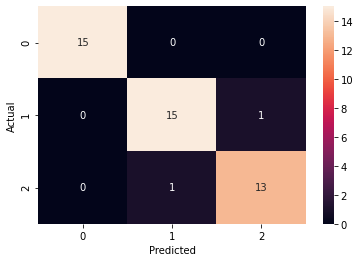

In [28]:
# Model evaluation
evaluate(lr, y_pred)

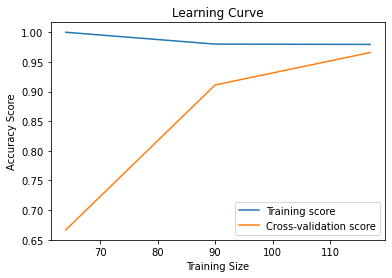

In [29]:
# Learning Curve
learn_curve(lr)

### 4. Support Vector Classification

In [30]:
# Hyperparameter tuning
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svm = SVC()

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'kernel': 'poly'}


In [31]:
# Fit the model with best parameters
svm = SVC(kernel = grid_search.best_params_['kernel'])
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

print("Train accuracy=",svm.score(X_train, y_train))
print ("Test accuracy=",accuracy_score(y_test, y_pred))

Train accuracy= 0.9705882352941176
Test accuracy= 0.9777777777777777


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



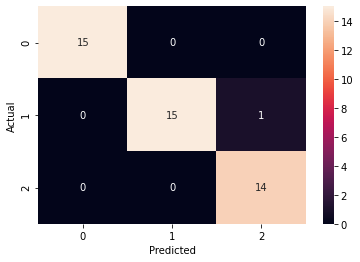

In [32]:
# Model evaluation
evaluate(svm, y_pred)

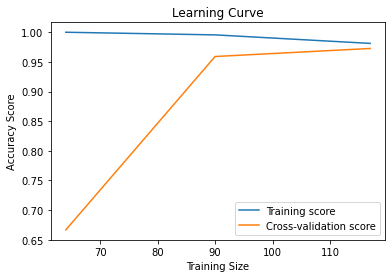

In [33]:
# Learning Curve
learn_curve(svm)

### 5. Linear Discriminant Analysis (LDA)

In [34]:
# Hyperparameter tuning
param_grid = {'solver': ['svd', 'lsqr', 'eigen'],
              'tol': [0.0001, 0.0002, 0.0003]}

lda = LinearDiscriminantAnalysis()

grid_search = GridSearchCV(estimator=lda, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'solver': 'svd', 'tol': 0.0001}


In [35]:
# Fit the model with best parameters
lda = LinearDiscriminantAnalysis(solver=grid_search.best_params_['solver'], 
                                 tol=grid_search.best_params_['tol'])
lda.fit(X_train, y_train)

# Make predictions
lda_y_pred = lda.predict(X_test)


print("Train accuracy=",lda.score(X_train, y_train))
print ("Test accuracy=",accuracy_score(y_test, lda_y_pred))

Train accuracy= 0.9705882352941176
Test accuracy= 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



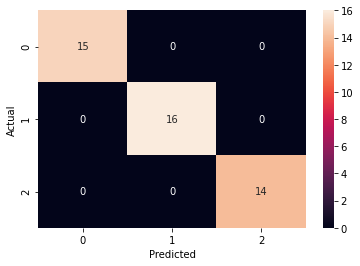

In [36]:
# Model evaluation
evaluate(lda, lda_y_pred)

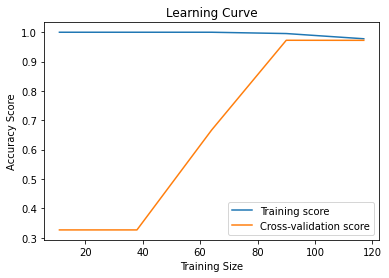

In [37]:
# Learning Curve
learn_curve(lda)

<h1><u>After Standarization of Dataset</u></h1>
<a id="std"></a>

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
std = StandardScaler()
X_train_transform = std.fit_transform(X_train)
X_test_transform = std.transform(X_test)

### 1. K- Neighbor Classifier

In [40]:
# Hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 10],
              'weights': ['uniform', 'distance'],
             'p': [1, 2]}

knc_2 = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knc_2, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [41]:
# Fit the model with best parameters
knc_2 = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                             weights=grid_search.best_params_['weights'],
                             p = grid_search.best_params_['p'])
knc_2.fit(X_train_transform, y_train)

# Make predictions
y_pred = knc_2.predict(X_test_transform)
print("Train accuracy=",knc_2.score(X_train_transform, y_train))
print ("Test accuracy=",accuracy_score(y_test, y_pred))

Train accuracy= 0.9705882352941176
Test accuracy= 0.9333333333333333


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



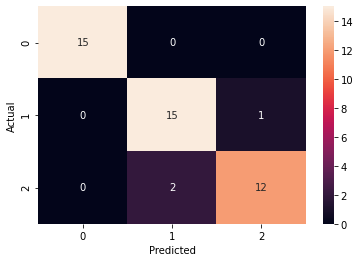

In [42]:
# Model evaluation
evaluate(knc_2, y_pred)

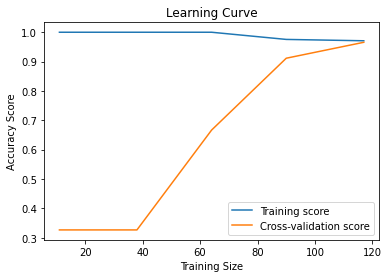

In [43]:
# Learning Curve
learn_curve(knc_2)

### 2. Linear Support Vector Classification

In [44]:
# Hyperparameter tuning
param_grid = {'penalty': ['l2', 'l1'],
              'loss': ['hinge', 'squared_hinge']}

lsvc_2 = LinearSVC()

grid_search = GridSearchCV(estimator=lsvc_2, param_grid=param_grid, cv=5)
grid_search.fit(X_train_transform, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'loss': 'squared_hinge', 'penalty': 'l2'}


In [45]:
# Fit the model with best parameters
lsvc_2 = LinearSVC(penalty=grid_search.best_params_['penalty'],
                   loss=grid_search.best_params_['loss'])

lsvc_2.fit(X_train_transform, y_train)

# Make predictions
y_pred = lsvc_2.predict(X_test_transform)

print("Train accuracy=",lsvc_2.score(X_train_transform, y_train))
print ("Test accuracy=",accuracy_score(y_test, y_pred))

Train accuracy= 0.9607843137254902
Test accuracy= 0.9111111111111111


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.88      0.88        16
           2       0.86      0.86      0.86        14

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



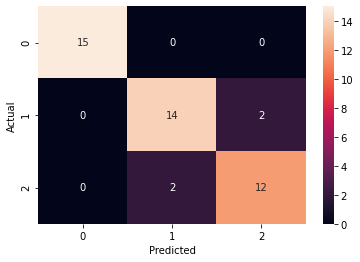

In [46]:
# Model evaluation
evaluate(lsvc_2, y_pred)

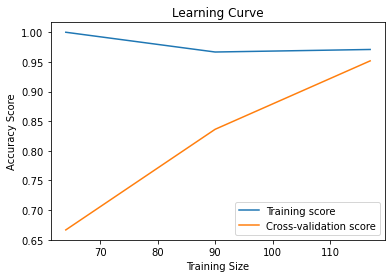

In [47]:
# Learning Curve
learn_curve(lsvc_2)

### 3. Logistic regression

In [48]:
# Hyperparameter tuning
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
              'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
              'tol': [0.0001, 0.0002, 0.0003],
              'C': [1.0, 0.8, 0.6],
              "random_state":[42, None],
              'max_iter': [100, 200, 500],
              'multi_class': ['auto', 'ovr', 'multinomial']}

lr_2 = LogisticRegression()

grid_search = GridSearchCV(estimator=lr_2, param_grid=param_grid, cv=5)
grid_search.fit(X_train_transform, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'C': 1.0, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l1', 'random_state': 42, 'solver': 'saga', 'tol': 0.0001}


In [49]:
# Fit the model with best parameters
lr_2 = LogisticRegression(solver = grid_search.best_params_['solver'],
                          penalty = grid_search.best_params_['penalty'],
                          C = grid_search.best_params_['C'],
                          tol = grid_search.best_params_['tol'],
                          random_state = grid_search.best_params_['random_state'],
                          max_iter = grid_search.best_params_['max_iter'],
                          multi_class = grid_search.best_params_['multi_class'])

lr_2.fit(X_train_transform, y_train)

# Make predictions
y_pred = lr_2.predict(X_test_transform)

print("Train accuracy=",lr_2.score(X_train_transform, y_train))
print ("Test accuracy=",accuracy_score(y_test, y_pred))

Train accuracy= 0.9705882352941176
Test accuracy= 0.9333333333333333


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



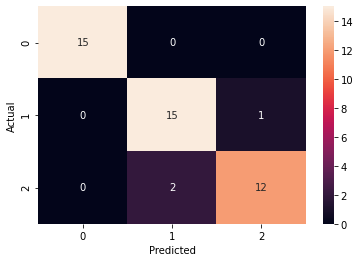

In [50]:
# Model evaluation
evaluate(lr_2, y_pred)

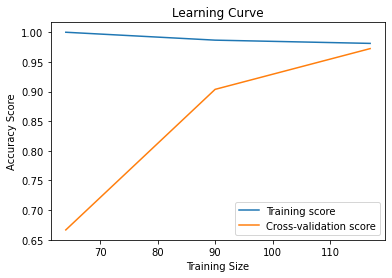

In [51]:
# Learning Curve
learn_curve(lr_2)

### 4. Support Vector Classification

In [52]:
# Hyperparameter tuning
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svm_2 = SVC()

grid_search = GridSearchCV(estimator=svm_2, param_grid=param_grid, cv=5)
grid_search.fit(X_train_transform, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'kernel': 'rbf'}


In [53]:
# Fit the model with best parameters
svm_2 = SVC(kernel = grid_search.best_params_['kernel'])
svm_2.fit(X_train_transform, y_train)

# Make predictions
y_pred = svm_2.predict(X_test_transform)

print("Train accuracy=",svm_2.score(X_train_transform, y_train))
print ("Test accuracy=",accuracy_score(y_test, y_pred))

Train accuracy= 0.9803921568627451
Test accuracy= 0.9333333333333333


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



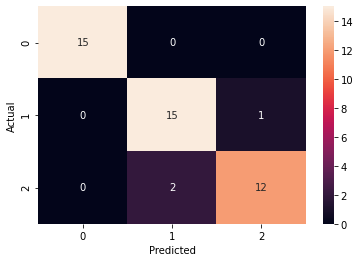

In [54]:
# Model evaluation
evaluate(svm_2, y_pred)

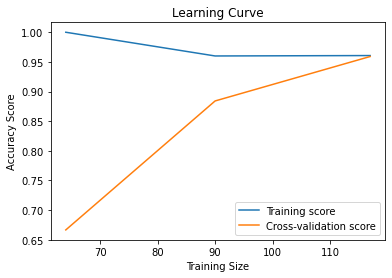

In [55]:
# Learning Curve
learn_curve(svm_2)

### 5. Linear Discriminant Analysis (LDA)

In [56]:
# Hyperparameter tuning
param_grid = {'solver': ['svd', 'lsqr', 'eigen'],
              'tol': [0.0001, 0.0002, 0.0003]}

lda_2 = LinearDiscriminantAnalysis()

grid_search = GridSearchCV(estimator=lda_2, param_grid=param_grid, cv=5)
grid_search.fit(X_train_transform, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'solver': 'svd', 'tol': 0.0001}


In [57]:
# Fit the model with best parameters
lda_2 = LinearDiscriminantAnalysis(solver=grid_search.best_params_['solver'], 
                                 tol=grid_search.best_params_['tol'])
lda_2.fit(X_train_transform, y_train)

# Make predictions
lda_y_pred = lda_2.predict(X_test_transform)


print("Train accuracy=",lda_2.score(X_train_transform, y_train))
print ("Test accuracy=",accuracy_score(y_test, lda_y_pred))

Train accuracy= 0.9705882352941176
Test accuracy= 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



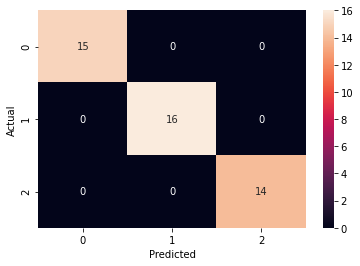

In [58]:
# Model evaluation
evaluate(lda_2, lda_y_pred)

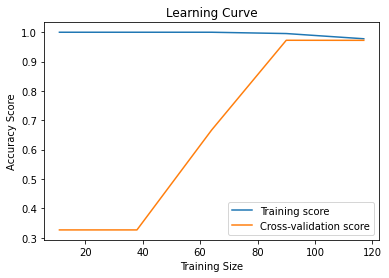

In [59]:
# Learning Curve
learn_curve(lda_2)

** **

<h1><u>Observation</u></h1>
<a id="Observation"></a>

<table style="width: 80%; height: 300px; border: 1px solid black; margin: auto;">
    <caption style="text-align: center; font-weight: bold;">Accuracy on Raw Iris Data</caption>
  <tr>
    <th style="text-align: left;">Model</th>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
  </tr>
  <tr>
    <td style="text-align: left;">K- Neighbor Classifier</td>
    <td>0.960784314</td>
    <td>0.977777778</td>
  </tr>
    <tr>
    <td style="text-align: left;">Linear Support Vector Classification</td>
    <td>0.960784314</td>
    <td>0.955555556</td>
  </tr>
  <tr>
    <td style="text-align: left;">Logistic regression</td>
    <td>0.970588235</td>
    <td>0.955555556</td>
  </tr>
    <tr>
    <td style="text-align: left;">Support Vector Classification</td>
    <td>0.970588235</td>
    <td>0.977777778</td>
  </tr>
  <tr>
    <td style="text-align: left;">Linear Discriminant Analysis (LDA)</td>
    <td>0.970588235</td>
    <td>1.0</td>
  </tr>
</table>


<table style="width: 80%; height: 300px; border: 1px solid black; margin: auto;">
  <caption style="text-align: center;font-weight: bold;">Accuracy on Standarized Data</caption>
  <tr>
    <th style="text-align: left;">Model</th>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
  </tr>
  <tr>
    <td style="text-align: left;">K- Neighbor Classifier</td>
    <td>0.970588235</td>
    <td>0.933333333</td>
  </tr>
  <tr>
    <td style="text-align: left;">Linear Support Vector Classification</td>
    <td>0.960784314</td>
    <td>0.911111111</td>
  </tr>
  <tr>
    <td style="text-align: left;">Logistic regression</td>
    <td>0.970588235</td>
    <td>0.933333333</td>
  </tr>
    <tr>
    <td style="text-align: left;">Support Vector Classification</td>
    <td>0.980392157</td>
    <td>0.933333333</td>
  </tr>
  <tr>
    <td style="text-align: left;">Linear Discriminant Analysis (LDA)</td>
    <td>0.970588235</td>
    <td>1.0</td>
  </tr>
</table>


### Model Performance Analysis: K-Neighbors Classifier (KNC), Linear Discriminant Analysis (LDA), Logistic Regression (LR), Support Vector Machine (SVM), and Linear Support Vector Classifier (LSVC)

The analysis of the learning curves for the K-Neighbors Classifier (KNC), Linear Discriminant Analysis (LDA), Logistic Regression (LR), Support Vector Machine (SVM), and Linear Support Vector Classifier (LSVC) provides insights into their performance and tendencies towards overfitting or underfitting.

For the **K-Neighbors Classifier (KNC)**, the learning curve shows a high training score close to 1, indicating that the model fits the training data very well. However, the cross-validation score starts low and gradually increases, showing a significant gap between the training and validation scores. This gap indicates overfitting, where the model performs well on training data but poorly on unseen data. As more training data is provided, the cross-validation score improves, suggesting that the model benefits from more data but still struggles with generalization.

The **Linear Discriminant Analysis (LDA)** model exhibits a learning curve where both training and cross-validation scores are high and closely aligned. This indicates that LDA performs well on both training and unseen data, showing good generalization. The slight decrease in the training score with increasing training size is normal and reflects a balanced model without significant overfitting or underfitting issues.

For the **Logistic Regression (LR)** model, the learning curve shows a high training score and a rapidly increasing cross-validation score. As the training size increases, the cross-validation score approaches the training score, indicating improved generalization and reduced overfitting. The model shows signs of initial overfitting with a substantial gap between training and validation scores, but this gap narrows as more data is added.

The **Support Vector Machine (SVM)** model displays a similar trend with high training scores and steadily improving cross-validation scores. The gap between the training and validation scores narrows with more training data, suggesting that the model's generalization improves over time. Initially, there is overfitting, but the model adapts well as the dataset size increases.

Finally, the **Linear Support Vector Classifier (LSVC)** also shows a high training score, with the cross-validation score starting lower and increasing significantly as the training size grows. This model exhibits initial overfitting, but the overfitting decreases with more training data. The narrowing gap between training and validation scores indicates improved generalization, though some overfitting may still persist.

### Conclusion

Overall, all models show some degree of overfitting initially, with high training scores and lower cross-validation scores. As the training size increases, the cross-validation scores improve across all models, indicating better generalization. **KNC** shows the most pronounced overfitting, while **LR**, **SVM**, and **LSVC** demonstrate improved performance and reduced overfitting as more data is provided. **LDA** stands out with closely aligned training and cross-validation scores, suggesting it handles the data well without significant overfitting or underfitting. 